In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
training_data=pd.read_csv('ml_case_training_data.csv')
churn_data=pd.read_csv('ml_case_training_output.csv')
historic_data=pd.read_csv('ml_case_training_hist_data.csv')

In [138]:
training_data.head(10)
training_data.info()
training_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

,count,mean,std,min,25%,50%,75%,max
campaign_disc_ele,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,16096.0,194804.384630,679515.083441,-125276.000000,5906.250000,15332.500000,50221.500000,1.609711e+07
cons_gas_12m,16096.0,31911.636742,177588.456233,-3037.000000,0.000000,0.000000,0.000000,4.188440e+06
cons_last_month,16096.0,19461.536158,82356.756560,-91386.000000,0.000000,901.000000,4127.000000,4.538720e+06
forecast_base_bill_ele,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_base_bill_year,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_bill_12m,3508.0,3837.441866,5425.744327,-2503.480000,1158.175000,2187.230000,4246.555000,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.000000,0.000000,42.215000,228.117500,9.682890e+03
forecast_cons_12m,16096.0,2370.555949,4035.085664,-16689.260000,513.230000,1179.160000,2692.077500,1.038019e+05
forecast_cons_year,16096.0,1907.347229,5257.364759,-85627.000000,0.000000,378.000000,1994.250000,1.753750e+05


In [4]:
training_data['activity_new'].value_counts(dropna=False)

NaN                                 9545
apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
                                    ... 
aacewucldmklslcffeckexipaemmsdfk       1
uuxeifdawaobxfxxefkdfxkmsmbfoamf       1
eamiapdokbfumefocubefudcowecllla       1
aplsmkockmiifibukmmmomommebkdpfk       1
akakmkfwoesfipbpaodfippfklpkuxdd       1
Name: activity_new, Length: 420, dtype: int64

In [5]:
training_data['channel_sales'].value_counts(dropna=False)

foosdfpfkusacimwkcsosbicdxkicaua    7377
NaN                                 4218
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [6]:
training_data['channel_sales'].nunique(dropna=False)

8

In [3]:
training_data['has_gas'].value_counts(dropna=False)

f    13132
t     2964
Name: has_gas, dtype: int64

In [4]:
training_data['has_gas']=training_data['has_gas'].replace(('f','t'),(0,1))

In [5]:
train=pd.merge(training_data,churn_data,on='id')

In [61]:
train.isnull().sum()/len(train.index)*100

id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele     

In [10]:
null_values=train.isnull().sum()/len(train.index)*100

<AxesSubplot:>

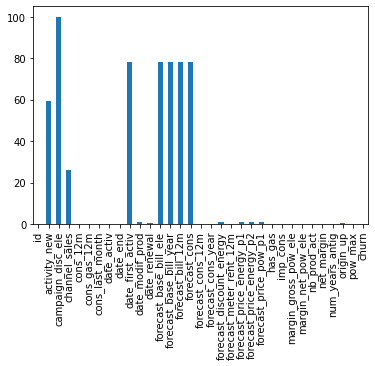

In [11]:
null_values.plot(kind='bar')

In [12]:
churn=train[['id','churn']]

In [13]:
churn

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [14]:
total_churn=churn.groupby('churn').count()

In [15]:
total_churn

,id
churn,
0,14501
1,1595


In [16]:
churn_percentage=total_churn/total_churn.sum()*100

In [17]:
churn_percentage

,id
churn,
0,90.090706
1,9.909294


<AxesSubplot:xlabel='Companies'>

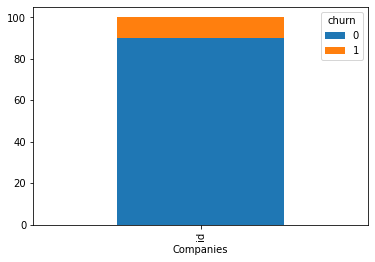

In [25]:
churn_percentage.T.plot(kind='bar',stacked=True,xlabel='Companies')

In [6]:
train.drop(columns=["campaign_disc_ele", "date_first_activ", "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons","activity_new","channel_sales","origin_up"], inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   cons_12m                  16096 non-null  int64  
 2   cons_gas_12m              16096 non-null  int64  
 3   cons_last_month           16096 non-null  int64  
 4   date_activ                16096 non-null  object 
 5   date_end                  16094 non-null  object 
 6   date_modif_prod           15939 non-null  object 
 7   date_renewal              16056 non-null  object 
 8   forecast_cons_12m         16096 non-null  float64
 9   forecast_cons_year        16096 non-null  int64  
 10  forecast_discount_energy  15970 non-null  float64
 11  forecast_meter_rent_12m   16096 non-null  float64
 12  forecast_price_energy_p1  15970 non-null  float64
 13  forecast_price_energy_p2  15970 non-null  float64
 14  foreca

In [29]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [8]:
train['date_activ']=pd.to_datetime(train['date_activ'])
train['date_end']=pd.to_datetime(train['date_end'])
train['date_modif_prod']=pd.to_datetime(train['date_modif_prod'])
train['date_renewal']=pd.to_datetime(train['date_renewal'])

In [9]:
historic_data.info()
train['date_end']=train['date_end'].fillna(train['date_end'].value_counts().index[0])
train['date_modif_prod']=train['date_modif_prod'].fillna(train['date_modif_prod'].value_counts().index[0])
train['date_renewal']=train['date_renewal'].fillna(train['date_renewal'].value_counts().index[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
historic_data['price_date']=pd.to_datetime(historic_data['price_date'])

In [11]:
columns=historic_data.select_dtypes('float64')

In [12]:
for x in columns:
    historic_data[x]=historic_data[x].fillna(historic_data[x].median())

In [13]:
historic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_p1_var,193002.0,0.141027,0.025032,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,193002.0,0.054630,0.049924,0.000000,0.000000,0.085483,0.101673,0.229788
price_p3_var,193002.0,0.030496,0.036298,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,193002.0,43.332175,5.419345,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,193002.0,10.622871,12.841899,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,193002.0,6.409981,7.773595,-0.065172,0.000000,0.000000,16.226389,17.458221


In [14]:
columns_fix=historic_data.filter(regex='fix').columns
print(columns_fix)

Index(['price_p1_fix', 'price_p2_fix', 'price_p3_fix'], dtype='object')


In [15]:
historic_data.loc[historic_data["price_p1_fix"] < 0,"price_p1_fix"] = historic_data["price_p1_fix"].median() 
historic_data.loc[historic_data["price_p2_fix"] < 0,"price_p2_fix"] = historic_data["price_p2_fix"].median() 
historic_data.loc[historic_data["price_p3_fix"] < 0,"price_p3_fix"] = historic_data["price_p3_fix"].median()

In [16]:
historic_data.head(20)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [17]:
mean=historic_data.groupby('id').mean()

In [18]:
mean

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [19]:
train=pd.merge(train,mean,on='id')

In [24]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   cons_12m                  16096 non-null  int64  
 2   cons_gas_12m              16096 non-null  int64  
 3   cons_last_month           16096 non-null  int64  
 4   forecast_cons_12m         16096 non-null  float64
 5   forecast_cons_year        16096 non-null  int64  
 6   forecast_discount_energy  16096 non-null  float64
 7   forecast_meter_rent_12m   16096 non-null  float64
 8   forecast_price_energy_p1  16096 non-null  float64
 9   forecast_price_energy_p2  16096 non-null  float64
 10  forecast_price_pow_p1     16096 non-null  float64
 11  has_gas                   16096 non-null  int64  
 12  imp_cons                  16096 non-null  float64
 13  margin_gross_pow_ele      16096 non-null  float64
 14  margin

In [21]:
train.corr()
date_columns=train.select_dtypes('datetime')
name_columns=['month_activ','month_end','month_modif_prod','month_renewal']
reference_date=dt.datetime(2016,1,1)
for y,x in zip(name_columns,date_columns):
    train[y]=((reference_date-train[x])/np.timedelta64(1,'M')).astype('int')
train.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],inplace=True)

In [23]:
train.fillna(train.mean(),inplace=True)
y=train['churn']
x=train.drop(labels=['id','churn'],axis=1)
print(y)
print(x)

0        0
1        1
2        0
3        0
4        0
        ..
16091    0
16092    1
16093    1
16094    0
16095    0
Name: churn, Length: 16096, dtype: int64
       cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0        309275             0            10025           26520.30   
1             0         54946                0               0.00   
2          4660             0                0             189.95   
3           544             0                0              47.96   
4          1584             0                0             240.04   
...         ...           ...              ...                ...   
16091     32270         47940                0            4648.01   
16092      7223             0              181             631.69   
16093      1844             0              179             190.39   
16094       131             0                0              19.34   
16095      8730             0                0             762.41   

       fo

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
logreg=LogisticRegression(max_iter=1000)

In [27]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred=logreg.predict(x_test)

In [29]:
metrics.accuracy_score(y_test,y_pred)

0.893141153081511

In [30]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

In [244]:
confusion_matrix

array([[3593,    4],
       [ 426,    1]])

In [32]:
logreg.coef_[0]

array([-1.62530928e-07, -1.32426728e-06, -2.42538442e-06,  4.88591084e-06,
        5.93925631e-05, -4.77301480e-04,  7.08178491e-04, -4.98118553e-05,
       -3.50924931e-06, -1.42006033e-02, -7.11291037e-05, -5.57204083e-04,
        3.64871220e-03,  5.10055292e-03, -4.81126251e-04,  2.88874816e-04,
       -1.52059155e-03, -2.36653400e-03, -4.99726017e-05, -3.50133274e-06,
        1.07734074e-06, -1.39771108e-02,  6.24941054e-04,  1.94385220e-04,
       -1.79019842e-02,  2.58159943e-03, -5.49253593e-03, -1.48225746e-03])